# Importing the Data

- See original post at http://3leafnodes.com/univariate-linear-regression.
- Always do proper research before trading with any algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-white')

# replace the path as needed
AMZN_df = pd.read_csv('../data/AMZN.csv', index_col=0)

# Exploring the Data

In [2]:
AMZN_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
AMZN_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-27,990.690002,998.799988,976.000000,976.780029,976.780029,3782400
2017-06-28,978.549988,990.679993,969.210022,990.330017,990.330017,3737600
2017-06-29,979.000000,987.559998,965.250000,975.929993,975.929993,4303000
2017-06-30,980.119995,983.469971,967.609985,968.000000,968.000000,3357200
2017-07-03,972.789978,974.489990,951.000000,953.659973,953.659973,2909100


In [4]:
AMZN_df.shape

(5067, 6)

In [5]:
AMZN_df.index

Index(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
       '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28', '1997-05-29',
       ...
       '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-26',
       '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30', '2017-07-03'],
      dtype='object', name='Date', length=5067)

<IPython.core.display.Javascript object>


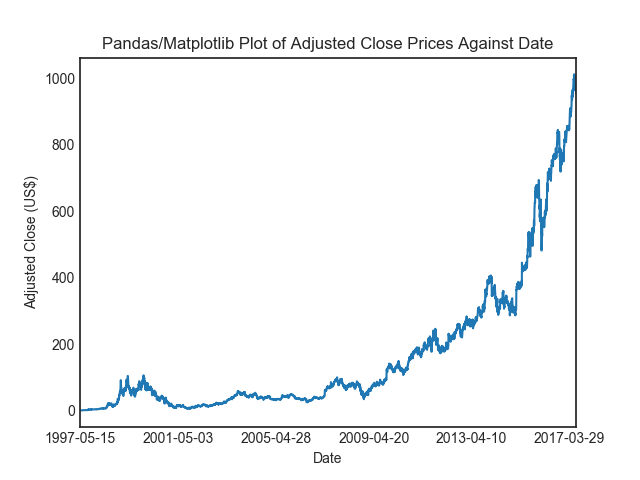

In [6]:
AMZN_df[['Adj Close']].plot(legend=False)
plt.ylabel("Adjusted Close (US$)")
plt.title("Pandas/Matplotlib Plot of Adjusted Close Prices Against Date")

<IPython.core.display.Javascript object>


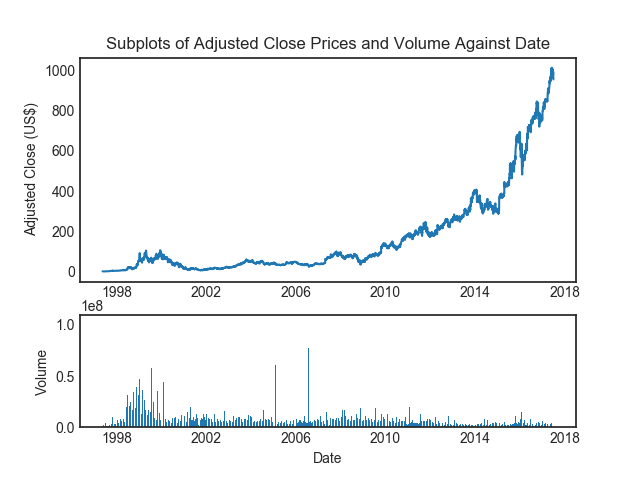

In [8]:
from matplotlib import gridspec
# run convert_index_to_datetimeindex(AMZN_df) in Preprocessing first

fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax0 = plt.subplot(gs[0])
plt.plot(AMZN_df.index, AMZN_df['Adj Close'])
plt.ylabel("Adjusted Close (US$)")
plt.title("Subplots of Adjusted Close Prices and Volume Against Date")

ax1 = plt.subplot(gs[1])
plt.bar(AMZN_df.index, AMZN_df['Volume'], width=1)
plt.xlabel("Date")
plt.ylabel("Volume")

<IPython.core.display.Javascript object>


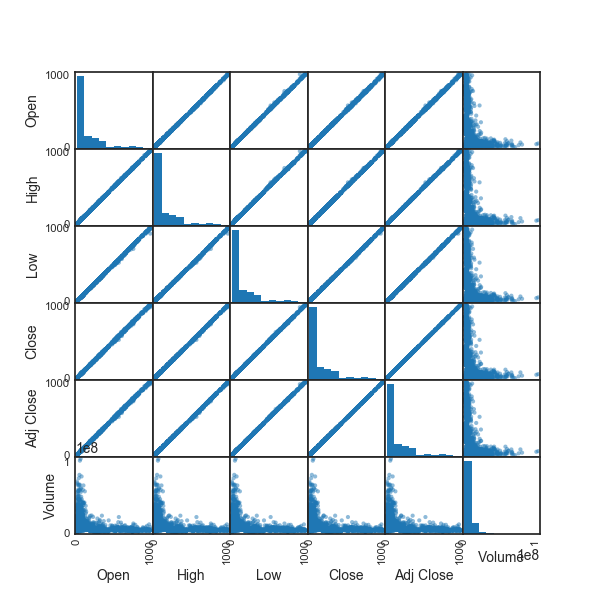

In [9]:
from pandas.plotting import scatter_matrix
attributes = AMZN_df.columns
scatter_matrix(AMZN_df[attributes], figsize=(6, 6));

# Preprocessing

In [7]:
def convert_index_to_datetimeindex(df):
    """ This is a utility function that is used to convert the index to a DateTimeIndex.
        Though the original DataFrame was imported by setting the index to the "Date" column
        this column is still in the "object" type which means it is a string. Converting the index to
        dtype = datetime64[ns] means that parts of the date can be easily extracted - like the day, month,
        and year, time deltas can be calculated and plots can be filled in with missing dates.
        Note: datetime64[ns] means a granularity of up to nanoseconds.        
    """
    # converting the dates to DateTimeIndex
    df.index = pd.to_datetime(df.index)

convert_index_to_datetimeindex(AMZN_df)

In [10]:
AMZN_df.index

DatetimeIndex(['1997-05-15', '1997-05-16', '1997-05-19', '1997-05-20',
               '1997-05-21', '1997-05-22', '1997-05-23', '1997-05-27',
               '1997-05-28', '1997-05-29',
               ...
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-03'],
              dtype='datetime64[ns]', name='Date', length=5067, freq=None)

In [11]:
from datetime import timedelta, datetime, date

def convert_date_to_time_elapsed(df):
    dates = df.index

    elapsed = dates - dates[0]
    df['Days Elapsed'] = elapsed.days

convert_date_to_time_elapsed(AMZN_df)

In [12]:
AMZN_df.head()

,Open,High,Low,Close,Adj Close,Volume,Days Elapsed
Date,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,4
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,5
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,6


# Fitting the Model using a Train/Test Split

In [13]:
X = AMZN_df['Days Elapsed']
X.head()

Date
1997-05-15    0
1997-05-16    1
1997-05-19    4
1997-05-20    5
1997-05-21    6
Name: Days Elapsed, dtype: int64

In [14]:
y = AMZN_df['Adj Close']
y.head()

Date
1997-05-15    1.958333
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635417
1997-05-21    1.427083
Name: Adj Close, dtype: float64

In [15]:
X.shape

(5067,)

In [16]:
X = X.values.reshape(-1,1)
X.shape

(5067, 1)

In [17]:
y.shape

(5067,)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [19]:
linreg.score(X_train, y_train)

0.625136498184789

In [20]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

16430.991558811442

In [21]:
linreg.coef_

array([ 0.08017787])

In [22]:
linreg.intercept_

-127.80625275029112

In [23]:
def convert_time_elapsed_to_date(days_elapsed, df):
    days_elapsed = days_elapsed.reshape(1, -1)[0]
    days_elapsed = pd.to_timedelta(days_elapsed, unit='d')
    # date = original day + time elapsed
    return df.index[0] + days_elapsed

convert_time_elapsed_to_date(X_train, AMZN_df)

DatetimeIndex(['2013-10-14', '2014-11-20', '2015-03-05', '2005-07-25',
               '2012-10-02', '2015-02-24', '1999-11-24', '1998-02-09',
               '2014-05-15', '2008-09-02',
               ...
               '2000-03-02', '2011-02-25', '2014-10-01', '2001-06-20',
               '2016-09-06', '2016-12-16', '2010-05-06', '2003-12-10',
               '2007-09-26', '2008-03-27'],
              dtype='datetime64[ns]', length=3800, freq=None)

<IPython.core.display.Javascript object>


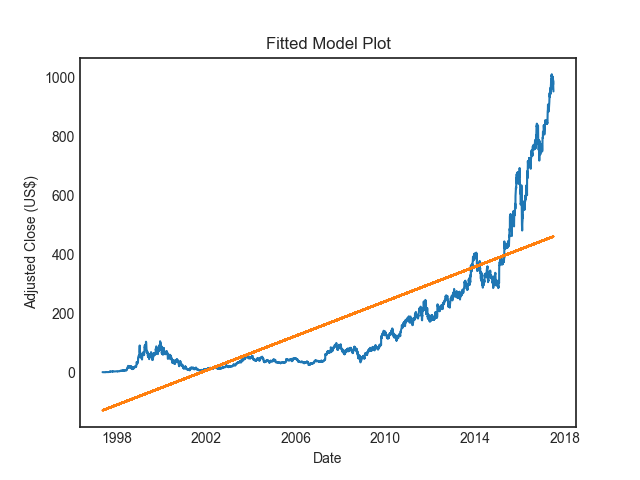

In [24]:
plt.figure()
plt.plot(AMZN_df.index, AMZN_df['Adj Close'])

# convert X_train to days elapsed
hypothesis_function = linreg.intercept_ + X_train*linreg.coef_
plt.plot(convert_time_elapsed_to_date(X_train, AMZN_df), hypothesis_function)
plt.ylabel("Adjusted Close (US$)")
plt.xlabel("Date")
plt.title("Fitted Model Plot")

# Fitting the Model using Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linregcv = LinearRegression()
y_pred = cross_val_predict(linregcv, X, y, cv=10)
scores = cross_val_score(linregcv, X, y, scoring="neg_mean_squared_error", cv=10)

In [26]:
# this is a numpy.ndarray
np.set_printoptions(suppress=True) # this suppresses the scientific notation
-scores

array([  33595.63913836,   14914.81619377,     166.46110124,
          2131.75940237,   12018.10906378,   19454.65479697,
         18002.87953032,   11182.19566593,    2882.68116282,
        206077.8339844 ])

In [27]:
scores.std()

58768.009904245591

In [28]:
-scores.mean()

32042.703003995477

# Appendix

<IPython.core.display.Javascript object>


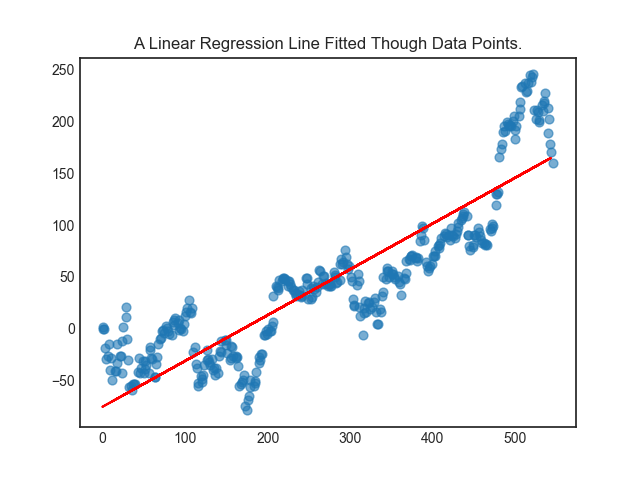

In [29]:
def create_lin_reg_diag():

    """ This function is not self contained and needs the code above to run.
        The data is a slice from Google stock data from 2016 to 3 July 2017 obtained from Yahoo! Finance.
        The data is imported, preprocessed, fitted using a train/test split and plotted
        following much of the same procedures as explained above.       
    """

    GOOGL_df = pd.read_csv('../data/GOOGL.csv', index_col=0)
    convert_index_to_datetimeindex(GOOGL_df)
    convert_date_to_time_elapsed(GOOGL_df)
    GOOGL_df = GOOGL_df['2016':]
    GOOGL_df['Days Elapsed'] = GOOGL_df['Days Elapsed'] - GOOGL_df['Days Elapsed'][0]
    GOOGL_df['Adj Close'] = GOOGL_df['Adj Close'] - GOOGL_df['Adj Close'][0]

    X_ = GOOGL_df['Days Elapsed']
    y_ = GOOGL_df['Adj Close']

    X_train, X_test, y_train, y_test = train_test_split(X_.values.reshape(-1,1),y_, random_state=0)

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)

    # plotting the figure
    plt.figure()
    plt.scatter(X_, y_, s=40, alpha=0.6)

    hypothesis_function = linreg.intercept_ + X_train*linreg.coef_
    plt.plot(X_train, hypothesis_function, color='r')

    plt.title("A Linear Regression Line Fitted Though Data Points.")
    plt.savefig('linear_reg_demo.png')

create_lin_reg_diag()